In [72]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sklearn

In [45]:
#importing the dataset
dataset = pd.read_csv('50_Startups.csv')

In [46]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [47]:
dataset.tail()

,R&D Spend,Administration,Marketing Spend,Profit
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [48]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [49]:
print("There are",dataset.shape[0],'rows and',dataset.shape[1],'columns')

There are 50 rows and 4 columns


In [50]:
print("There are",dataset.duplicated().sum(),"duplicate values in the dataset")

There are 0 duplicate values in the dataset


In [51]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [53]:
c = dataset.corr()
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Exploratory Data Analysis (EDA on dataset)

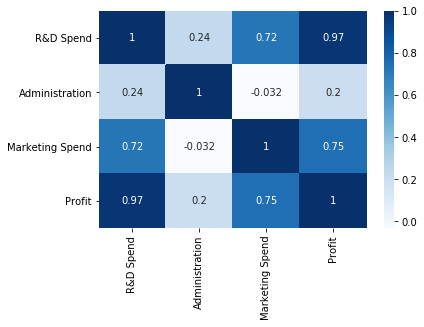

In [54]:
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

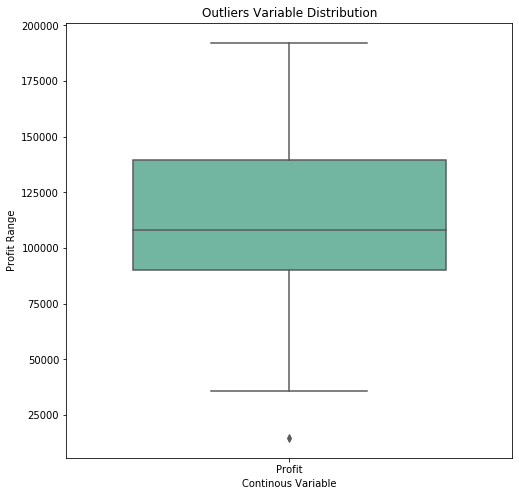

In [55]:
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=dataset[outliers], orient="v", palette = "Set2", width = 0.7)

plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continous Variable")
plt.show()

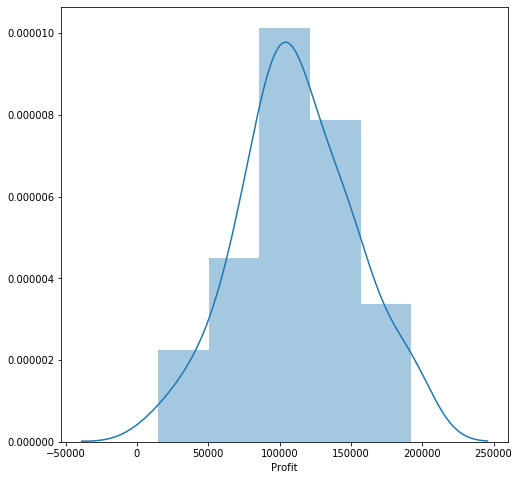

In [56]:
sns.distplot(dataset['Profit'],bins=5,kde=True)
plt.show()

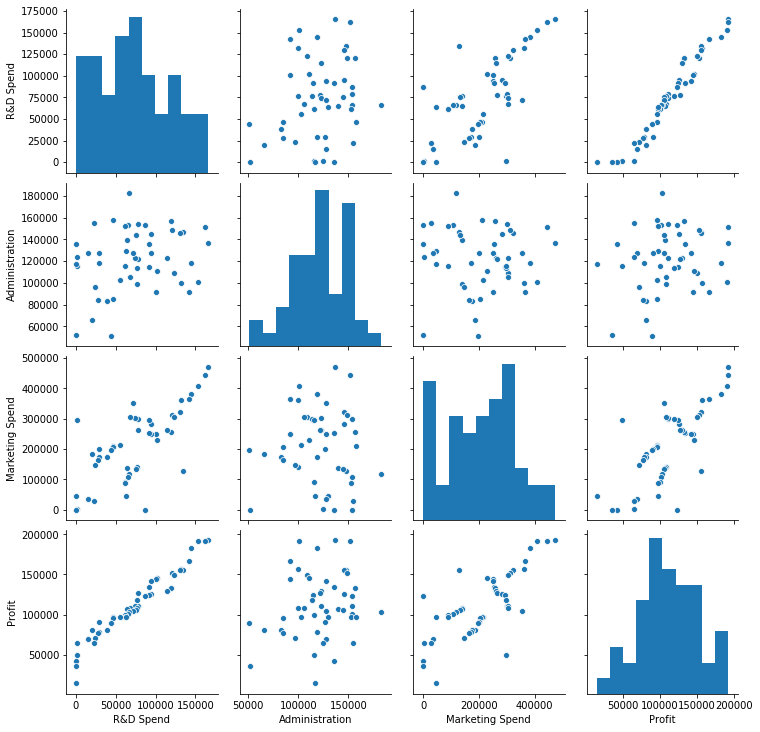

In [57]:
sns.pairplot(dataset)
plt.show()

# Model building

In [58]:
X = dataset.iloc[:,:-1] #without target variable
y = dataset.iloc[:, 3] #with target variable

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
labelencoder = LabelEncoder()
X.iloc[:, 2] = labelencoder.fit_transform(X.iloc[:, 2])
X1 = pd.DataFrame(X)
X1.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,47
1,162597.70,151377.59,46
2,153441.51,101145.55,45
3,144372.41,118671.85,44
4,142107.34,91391.77,43


In [61]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)
x_train

,R&D Spend,Administration,Marketing Spend
7,130298.13,145530.06,40
14,119943.24,156547.42,28
45,1000.23,124153.04,1
48,542.05,51743.15,0
29,65605.48,153032.06,8
15,114523.61,122616.84,29
30,61994.48,115641.28,7
32,63408.86,129219.61,5
16,78013.11,121597.55,30
42,23640.93,96189.63,14


In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
model = LinearRegression() #object
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


In [64]:
y_pred = model.predict(x_test)
y_pred

array([103365.65430448, 132409.63159464, 133669.58924177,  71596.33493623,
       179574.8809234 , 114195.96899299,  65656.85292429,  97938.81018901,
       114412.29898539, 169772.36831918,  96050.9051499 ,  87515.25731045,
       110242.6075272 ,  90000.89195708, 127479.23515393])

In [65]:
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9324057207634493
Model Score/Performance on Training data 0.9506671824404849


In [66]:
df = pd.DataFrame(data={'Predicted value':y_pred,'Actual Value':y_test})
df

,Predicted value,Actual Value
28,103365.654304,103282.38
11,132409.631595,144259.40
10,133669.589242,146121.95
41,71596.334936,77798.83
2,179574.880923,191050.39
27,114195.968993,105008.31
38,65656.852924,81229.06
31,97938.810189,97483.56
22,114412.298985,110352.25
4,169772.368319,166187.94


# Model Evaluation

In [67]:
from sklearn.metrics import r2_score

In [68]:
from sklearn.metrics import r2_score

r2Score = r2_score(y_pred, y_test)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 93.21346390789374


In [69]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred, y_test)
print("Mean Squarred Error is :" ,mse*100)

Mean Squarred Error is : 6524519362.317422


In [70]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squarred Error is : ",rmse*100)

Root Mean Squarred Error is :  807744.9697966198


In [71]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :" ,mae)

Mean Absolute Error is : 6603.238628961081


In [43]:
#Therefore the predicted value can ether be more or less then 6603.238628961081 units